In [1]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib
import warnings 
warnings.filterwarnings("ignore")

get_ipython().run_line_magic('matplotlib', 'inline')

In [84]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')


In [85]:
train[train['label'] == 0].head(10)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [86]:
train[train['label'] == 1].head(10)


,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [87]:
train.shape, test.shape


((31962, 3), (17197, 2))

In [88]:
train["label"].value_counts()


0    29720
1     2242
Name: label, dtype: int64

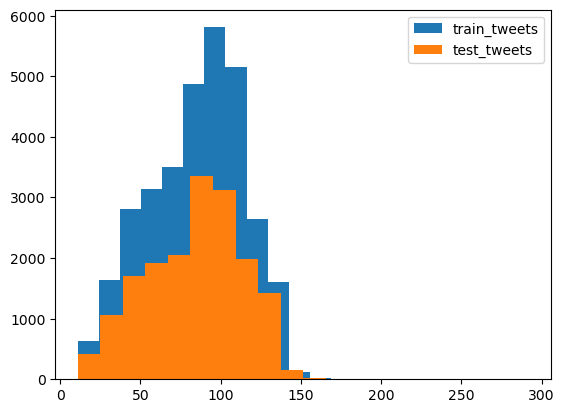

In [89]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [90]:
combi = pd.concat([train, test], ignore_index=True)
combi.shape

(49159, 3)

# Data Pre-Processing

In [91]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [92]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [93]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [94]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [95]:
combi.head(3)


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty


# Tokenization

In [96]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [97]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [16]:

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

# wordcloud for All Words

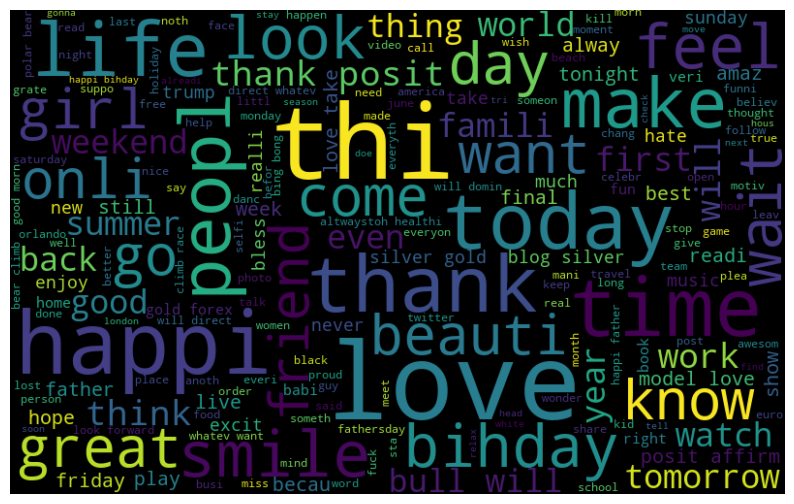

In [17]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Wordcloud for Positive Words

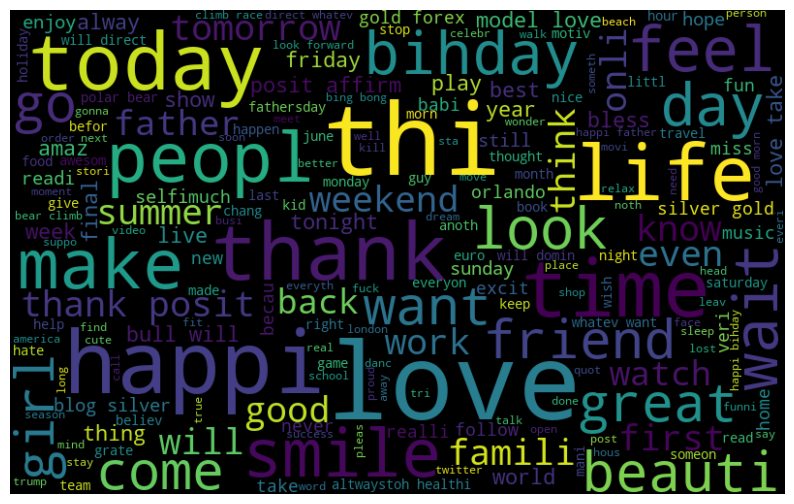

In [18]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Wordcloud for negative words

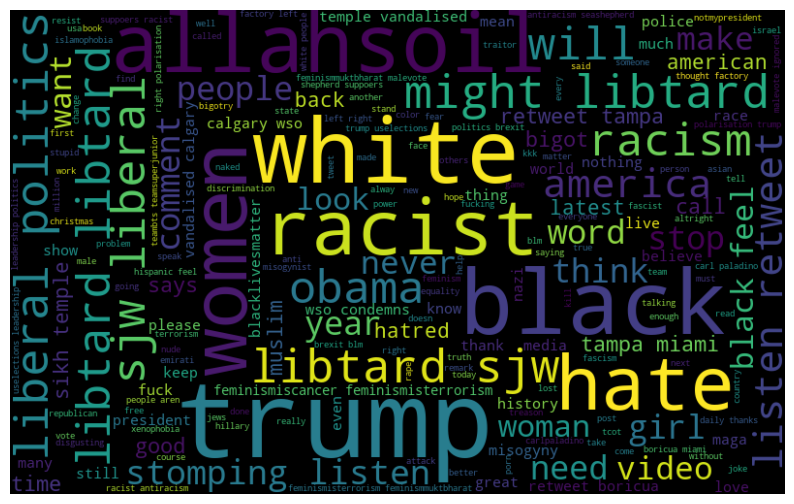

In [99]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [100]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

# Extracting Hashtags

In [101]:

# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

# Frequency of top 20 positive words used in the tweets

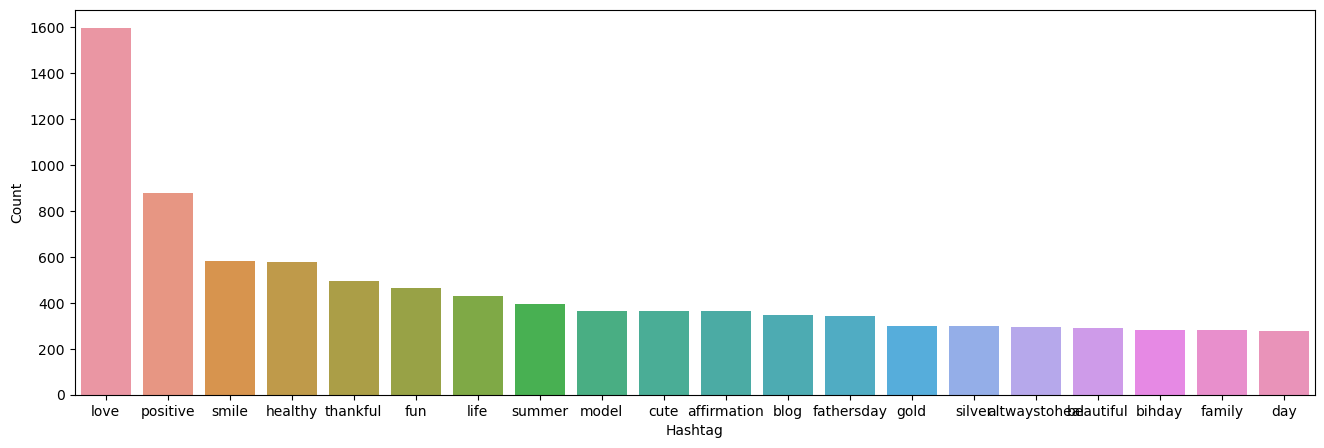

In [102]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# Frequency of top 20 negative words used in the tweets

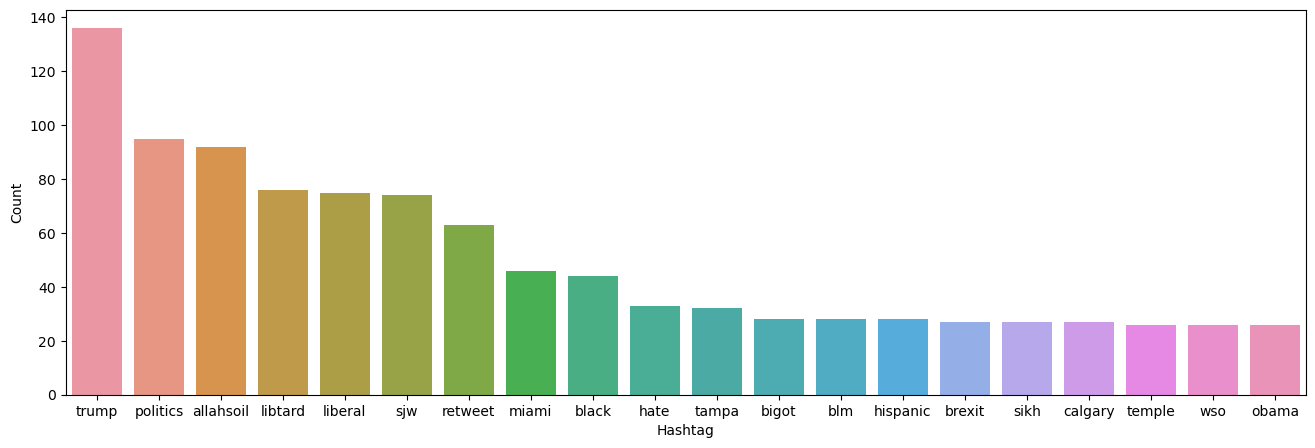

In [103]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [105]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape


(49159, 1000)

In [106]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

# Logistic Regression

In [107]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [108]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [109]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5017421602787456

In [110]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [111]:

train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [112]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(yvalid, prediction_int)
print(prediction)

[[0.97893004 0.02106996]
 [0.9722467  0.0277533 ]
 [0.90217956 0.09782044]
 ...
 [0.96301231 0.03698769]
 [0.93519651 0.06480349]
 [0.97328504 0.02671496]]


# SVM

In [113]:
#SVM
from sklearn import svm


In [114]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)

0.4851851851851852

In [115]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_svc_bow.csv', index=False)

In [116]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)
f1_score(yvalid, prediction_int)

0.4785046728971962

# Random Forest

In [117]:
#Random Forest 

In [118]:
from sklearn.ensemble import RandomForestClassifier


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11)

# Fit the model to the training data
rf.fit(xtrain_bow, ytrain)

# Make predictions on the validation set
prediction = rf.predict(xvalid_bow)

# Calculate the F1 score
f1 = f1_score(yvalid, prediction)
print("F1 Score:", f1)


F1 Score: 0.5216680294358136


In [120]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [121]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5148698884758364

# XGBoost

In [122]:
#XGBOOST
from xgboost import XGBClassifier


In [123]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5018867924528302

In [124]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

In [125]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5092592592592592

# Pie Chart Visualisation

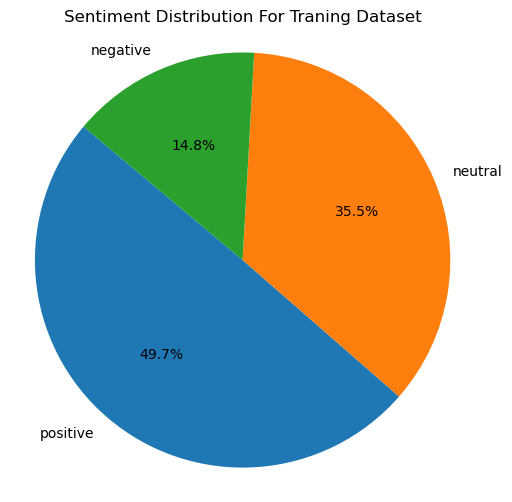

In [126]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the dataset
test_race = pd.read_csv('train_E6oV3lV.csv')

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
test_race['sentiment'] = test_race['tweet'].apply(get_sentiment)

# Count the number of each sentiment category
sentiment_counts = test_race['sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution For Traning Dataset')
plt.show()

# Pie Chart Visualisation

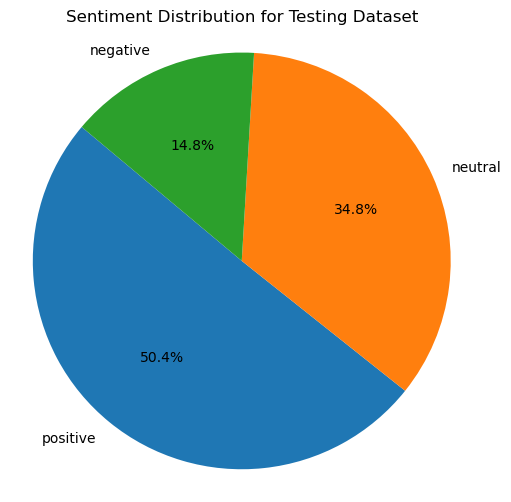

In [127]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the dataset
test_race = pd.read_csv('test_tweets_anuFYb8.csv')

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
test_race['sentiment'] = test_race['tweet'].apply(get_sentiment)

# Count the number of each sentiment category
sentiment_counts = test_race['sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution for Testing Dataset')
plt.show()

# Fine tuning the  models

In [128]:
from xgboost import XGBClassifier
import xgboost as xgb

dtrain = xgb.DMatrix(xtrain_tfidf, label=ytrain)
dvalid = xgb.DMatrix(xvalid_tfidf, label=yvalid)
dtest = xgb.DMatrix(xtrain_tfidf)

In [129]:
# Parameters that we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

In [130]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(int)
    preds = (preds >= 0.3).astype(int)
    return [('f1_score', f1_score(labels, preds))]

# Parameters that we are going to tune
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1
}


In [131]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10) 
    for min_child_weight in range(5,8)
]

In [132]:
max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

CV with max_depth=6, min_child_weight=5
	F1 Score 0.4272582 for 92 rounds
CV with max_depth=6, min_child_weight=6
	F1 Score 0.3959566 for 111 rounds
CV with max_depth=6, min_child_weight=7
	F1 Score 0.33758260000000007 for 61 rounds
CV with max_depth=7, min_child_weight=5
	F1 Score 0.42803199999999997 for 83 rounds
CV with max_depth=7, min_child_weight=6
	F1 Score 0.3964162 for 67 rounds
CV with max_depth=7, min_child_weight=7
	F1 Score 0.34276779999999996 for 79 rounds
CV with max_depth=8, min_child_weight=5
	F1 Score 0.4240898000000001 for 66 rounds
CV with max_depth=8, min_child_weight=6
	F1 Score 0.3951572 for 63 rounds
CV with max_depth=8, min_child_weight=7
	F1 Score 0.3445418 for 68 rounds
CV with max_depth=9, min_child_weight=5
	F1 Score 0.4267626 for 67 rounds
CV with max_depth=9, min_child_weight=6
	F1 Score 0.4053846 for 59 rounds
CV with max_depth=9, min_child_weight=7
	F1 Score 0.346597 for 76 rounds
Best params: 7, 5, F1 Score: 0.42803199999999997


In [133]:
params['max_depth'] = 9
params['min_child_weight'] = 5

In [134]:
max_f1 = 0.
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))

    # Update ETA
    params['eta'] = eta

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with eta=0.3
	F1 Score 0.4297308 for 88 rounds
CV with eta=0.2
	F1 Score 0.42677299999999996 for 81 rounds
CV with eta=0.1
	F1 Score 0.42216719999999996 for 157 rounds
CV with eta=0.05
	F1 Score 0.4102754 for 224 rounds
CV with eta=0.01
	F1 Score 0.0 for 0 rounds
CV with eta=0.005
	F1 Score 0.0 for 0 rounds
Best params: 0.3, F1 Score: 0.4297308


In [135]:
params['eta'] = .3


In [136]:
max_f1 = 0.
best_params = None
for gamma in range(0,15):
    print("CV with gamma={}".format(gamma/10.))

    # Update ETA
    params['gamma'] = gamma/10.

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = gamma/10.

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

CV with gamma=0.0
	F1 Score 0.4267626 for 67 rounds
CV with gamma=0.1
	F1 Score 0.4245495999999999 for 47 rounds
CV with gamma=0.2
	F1 Score 0.4239552 for 66 rounds
CV with gamma=0.3
	F1 Score 0.42636900000000005 for 64 rounds
CV with gamma=0.4
	F1 Score 0.43230759999999996 for 93 rounds
CV with gamma=0.5
	F1 Score 0.4302142 for 83 rounds
CV with gamma=0.6
	F1 Score 0.42739780000000005 for 65 rounds
CV with gamma=0.7
	F1 Score 0.423844 for 60 rounds
CV with gamma=0.8
	F1 Score 0.4255158 for 51 rounds
CV with gamma=0.9
	F1 Score 0.42428119999999997 for 54 rounds
CV with gamma=1.0
	F1 Score 0.42663719999999994 for 49 rounds
CV with gamma=1.1
	F1 Score 0.423452 for 49 rounds
CV with gamma=1.2
	F1 Score 0.423598 for 49 rounds
CV with gamma=1.3
	F1 Score 0.4187454 for 46 rounds
CV with gamma=1.4
	F1 Score 0.41745679999999996 for 45 rounds
Best params: 0.4, F1 Score: 0.43230759999999996


In [137]:
params['subsample'] = .9
params['colsample_bytree'] = .5

In [138]:
params['gamma'] = 0.9


In [139]:
params


{'objective': 'binary:logistic',
 'max_depth': 9,
 'min_child_weight': 5,
 'eta': 0.3,
 'subsample': 0.9,
 'colsample_bytree': 0.5,
 'gamma': 0.9}

In [140]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
)

[0]	Validation-logloss:0.25966	Validation-f1_score:0.00000
[1]	Validation-logloss:0.24164	Validation-f1_score:0.06780
[2]	Validation-logloss:0.22637	Validation-f1_score:0.14885
[3]	Validation-logloss:0.21911	Validation-f1_score:0.20339
[4]	Validation-logloss:0.21413	Validation-f1_score:0.25654
[5]	Validation-logloss:0.21136	Validation-f1_score:0.20743
[6]	Validation-logloss:0.20583	Validation-f1_score:0.23797
[7]	Validation-logloss:0.20324	Validation-f1_score:0.26634
[8]	Validation-logloss:0.20131	Validation-f1_score:0.30605
[9]	Validation-logloss:0.20003	Validation-f1_score:0.32825
[10]	Validation-logloss:0.19808	Validation-f1_score:0.32791
[11]	Validation-logloss:0.19700	Validation-f1_score:0.33333
[12]	Validation-logloss:0.19580	Validation-f1_score:0.33565
[13]	Validation-logloss:0.19430	Validation-f1_score:0.33604
[14]	Validation-logloss:0.19324	Validation-f1_score:0.33604
[15]	Validation-logloss:0.19202	Validation-f1_score:0.33643
[16]	Validation-logloss:0.19126	Validation-f1_scor

# Printing the Negative Tweets

In [141]:
negative_keywords = ["trump", "polit", "allahsoil", "liber", "libtard", "sjw", "retweet", 

                     "black", "hate", "bigot", "tampa", "obama", "blm", "hispan", "brexit", 

                     "sikh", "templ", "calgary", "wso"]
 
# Dummy classifier to mark tweets containing any of the negative_keywords as negative

test_race['predicted_label'] = test_race['tweet'].apply(lambda x: 1 if any(word in x.lower() for word in negative_keywords) else 0)
 
# Filter the tweets predicted as negative

negative_tweets = test_race[test_race['predicted_label'] == 1]
 

 


for index, row in negative_tweets.head(1122).iterrows():

    print(f"Tweet ID {row['id']}: {row['tweet']}\n")

Tweet ID 31982: thought factory: bbc neutrality on right wing fascism  #politics #media #blm #brexit #trump #leadership &gt;3 

Tweet ID 31993: i'll #never be #120 #again i'm   #i'm a #thick #women #blacktina

Tweet ID 32005: @user @user trumps invested billions into saudi. he empowers the people funding isis.   #trumpsahypocrite

Tweet ID 32044: @user .@user @user @user @user &lt;--- no more feeding at the public trough piggy. #michelleobamaâ¦ 

Tweet ID 32076:  @user only 741 retweets in over half a day   that's because gun owners like my hubby &amp; me don't respect your fanaticism 

Tweet ID 32078: #palladino : "i'll say whatÂ iÂ feel like saying.â #gopathetic #lookwhatyoudid #politics   #madcow  

Tweet ID 32085: @user @user @user   always, always, always somebody else's fault...  #bigot 

Tweet ID 32104: you might be a libtard if... #libtard  #sjw #liberal #politics 

Tweet ID 32110: #michelleobama is looking a bit 'dishevelled...' is she thinking about spending her retirement

Tweet ID 33312: what america owes #blacks    #africanamerican #reparations now

Tweet ID 33314: they still haven't moved! where are the paramedics!?!?! #trumpaz 

Tweet ID 33325: #film   bull up: you will dominate your bull and you will direct it whatever you want it to do. when you sta 

Tweet ID 33339: #lightroom   bull up: you will dominate your bull and you will direct it whatever you want it to do. when yo 

Tweet ID 33392: did you know that mormons teach that you are born black because of sins in the previous existence! 

Tweet ID 33411: stormy night by wolfgang blacke  via @user #storm #upset   #peace #mindfulness 

Tweet ID 33438: @user only #ass #hole is u in your #head #big hole= #no #brain #hea #love #truth #kindness #peace #compassion,ur #bigot 

Tweet ID 33446: you might be a libtard if... #libtard  #sjw #liberal #politics 

Tweet ID 33453: racism is on the rise. call it by its real name.  #crookedtrump  #trump

Tweet ID 33456: how, exactly, does she know these things?  sp

In [142]:

negative_keywords = ["trump", "polit", "allahsoil", "liber", "libtard", "sjw", "retweet", 

                     "black", "hate", "bigot", "tampa", "obama", "blm", "hispan", "brexit", 

                     "sikh", "templ", "calgary", "wso"]


print("Number of tweets classified as negative:", negative_tweets.shape[0])

Number of tweets classified as negative: 1122


# Printing the Positive Tweets

In [143]:


# List of positive keywords
positive_keywords = ["love", "posit", "smile", "healthi", "thank", "fun", "life", "affirm", "summer", "model",
                     "cute", "beauti", "happi", "blog", "friend", "fathersday", "gold", "day", "silver", "altwaystoh"]

# Dummy classifier to mark tweets containing any of the positive_keywords as positive
test_race['positive_label'] = test_race['tweet'].apply(lambda x: 1 if any(word in x.lower() for word in positive_keywords) else 0)

# Filter the tweets predicted as positive
positive_tweets = test_race[test_race['positive_label'] == 1]



# Print the first 10 positive tweets
for index, row in positive_tweets.head(7769).iterrows():
    print(f"Tweet ID {row['id']}: {row['tweet']}\n")


Tweet ID 31963: #studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦ 

Tweet ID 31965: safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!! 

Tweet ID 31967:   3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦ 

Tweet ID 31970: #finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸â¤ï¸â¤ï¸â¤ï¸ #thanks#aleeee !!! 

Tweet ID 31972: #delicious   #food #lovelife #capetown mannaepicure #resturantâ¦ 

Tweet ID 31973: 1000dayswasted - narcosis infinite ep.. make me aware.. grinding neuro bass #lifestyle   

Tweet ID 31976: good food, good life , #enjoy and   ðððððð this is called ~garlic bread~ ... #iloveitâ¦ 

Tweet ID 31979:  @user got my @user limited edition rain or shine set today!!  ! @user @user @user @user 

Tweet ID 31980: &amp; #love &amp; #hugs &amp; #kisses too! how to keep your #baby     #parenting #healthcare

Tweet ID 31983: hey guys tommorow is the last day of my 

Tweet ID 36085: notes to self adults love exchanging cards like we are young #adult #job #work   #events

Tweet ID 36091: les miserables i look at later. i find this musical movie absolutely fantastic and great!!!! #musicalmovie #great #beautiful &amp;  #loveit ð

Tweet ID 36092: i really dgaf about anyones opinions towards me! im gone do wtf i want and still breathe at the end of the day. aint huing nobody!   

Tweet ID 36095: can #lighttherapy help with   or #depression?   #altwaystoheal #healthy is #happy !! 

Tweet ID 36096:  â #gbp/usd drops fuher to 1.4130, cpi eyed   #blog #silver #gold #forex

Tweet ID 36097: solo #hots is fun. but....... feel alone ð¢  

Tweet ID 36098: ð±ð±ð±ðoh my god i can't believe @user retweeted my tweet oh thank u so much i'm really love ur voice   

Tweet ID 36104: i am thankful for love. #thankful #positive     

Tweet ID 36105: @user oh, so  -michael baze on trumpet player jay in longacres mile classic tvg #rip &amp; its the #4...#dam

Tweet ID 36861: can #atherapy and #musictherapy heal your life?   #altwaystoheal #healthy   #healing! 

Tweet ID 36862: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

Tweet ID 36863: luuuuuuuv â¤ï¸ you! #unconditionallove #daughter ð­ #proudmama   ðð #instagram #instalike ðð @user 

Tweet ID 36866: i am thankful for passion. #thankful #positive     

Tweet ID 36869: athens; santorini; mykonos; crete vacations: $599 -- summer in greece: 5 nights incl. island cruise -  travelsð 

Tweet ID 36870:  â #gbp/usd hits fresh 7-week lows   #blog #silver #gold #forex

Tweet ID 36871: check    #friday! 'the #girls' are back! check them out w. many other ##fashion #illustrations:    ...

Tweet ID 36874: man i am feeling myself for sure!!   #love #gay 

Tweet ID 36880: grab the sun while you can! ðð #sun #sunshine #summer   

Tweet ID 36881: #bubble #bokeh who has seen this? #proud #mom #1st   #goodday 

Tweet ID 36885:  @user dry w

Tweet ID 38992: indoor soccer practice and game day â½   #chsv

Tweet ID 38993: â­â­â­â­â­ review by emilie andreasen: "love them!" #etsy   #customer #feed... #easilysuede  

Tweet ID 38994: daddy.. you know how much i love you.. i miss you forever,,    father's day.. both of you still deep in my hea..

Tweet ID 38995: it's jacobs first time camping! &amp; it's going to be so much fun for him!ð¦ð¼ðâºï¸  

Tweet ID 38996:  â #united kingdom boe mpc vote unchanged meets forecasts (9)   #blog #silver #gold #forex

Tweet ID 38998: dropbox - rugged maxxx (4).jpg#love #instagood #tbt #photooftheday #cute #me #beautiful   #follow #followme  

Tweet ID 38999: #bible life church  sunday and happy father's day

Tweet ID 39002:   bihday to cecilia ,staff in cangzhou shenlong pipe manufacturing co.ltd.may she be happy all the time. 

Tweet ID 39005: everything that we should worry about is our happines. #happiness   #a #draw #drawingâ¦ 

Tweet ID 39006: lunch and cinema date with


Tweet ID 46581: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  

Tweet ID 46585: stress. anxiety. best friend gone. more anxiety. more stress. oveime tomorrow.. there's going to be nothing left of me. #stress  

Tweet ID 46587: happy father's day to all the fathers out there!!!     #fathers #day #fathersday   #bellpowpow 

Tweet ID 46589: @user @user @user @user @user @user @user  ðð  monday ðð 

Tweet ID 46591:   #fathersday to all   #sunrise in #mthood  @user @user @user @user @user @user 

Tweet ID 46596: the more you are thankful... unk #inspiration #gratitude  #quote #inspirational  

Tweet ID 46597: heading to work!!! beautiful day and a blessed one at that! ^_^   #sunnyday #onmywaytoworkâ¦ 

Tweet ID 46601: beautiful frames 2 #michaelfassbender #jamesmcavoy #cherik #mcfassy #mcavoy #shipper #au #flim   

Tweet ID 46602: @user so after 3 days with no tv or internet you have credited my account with a grand total of Â£3.60 so no

# Count of Tweets classified as Positive or Hate speech

In [144]:
# List of positive keywords
positive_keywords = ["love", "posit", "smile", "healthi", "thank", "fun", "life", "affirm", "summer", "model",
                     "cute", "beauti", "happi", "blog", "friend", "fathersday", "gold", "day", "silver", "altwaystoh"]
# Print the number of tweets classified as positive
print("Number of tweets classified as positive:", positive_tweets.shape[0])

Number of tweets classified as positive: 7769


# Confusion Matrix plot for XGBoost Model

F1 Score for BoW features: 0.5018867924528302
F1 Score for TF-IDF features: 0.5092592592592592


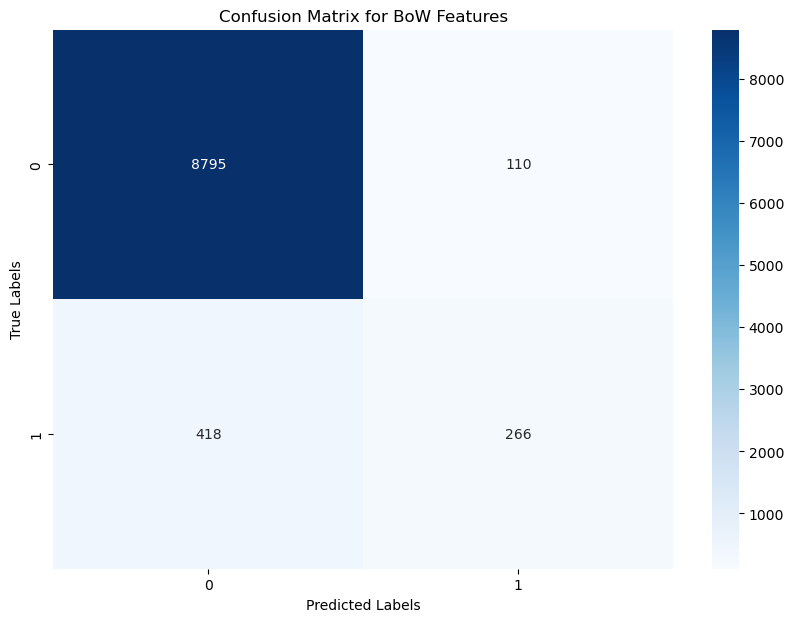

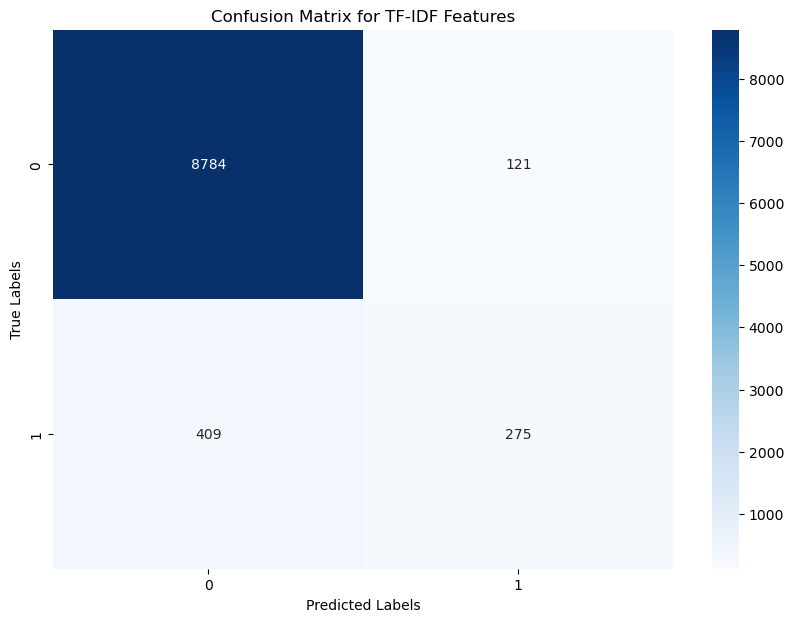

In [145]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming xtrain_bow, xvalid_bow, ytrain, and yvalid are already defined

# Fit the model for Bag of Words features
xgb_bow = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
# Predict on the validation set
prediction_bow = xgb_bow.predict(xvalid_bow)
# Calculate F1 score
print("F1 Score for BoW features:", f1_score(yvalid, prediction_bow))

# Generate the confusion matrix for BoW features
cm_bow = confusion_matrix(yvalid, prediction_bow)

# Fit the model for TF-IDF features
xgb_tfidf = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
# Predict on the validation set
prediction_tfidf = xgb_tfidf.predict(xvalid_tfidf)
# Calculate F1 score
print("F1 Score for TF-IDF features:", f1_score(yvalid, prediction_tfidf))

# Generate the confusion matrix for TF-IDF features
cm_tfidf = confusion_matrix(yvalid, prediction_tfidf)

# Plotting the confusion matrix for BoW features
plt.figure(figsize=(10,7))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for BoW Features')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the confusion matrix for TF-IDF features
plt.figure(figsize=(10,7))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for TF-IDF Features')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# ROC curve plot for XGBoost

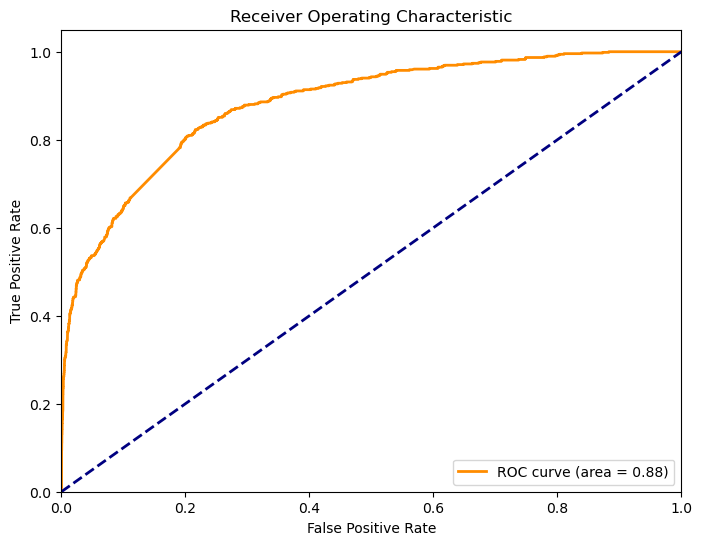

In [146]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming xvalid_tfidf is your validation set and yvalid are the true labels

# Fit the model on the training set
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

# Predict the probability estimates of the positive class
yvalid_prob = xgb_model.predict_proba(xvalid_tfidf)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(yvalid, yvalid_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Confusion Matrix plot for RandomForest model

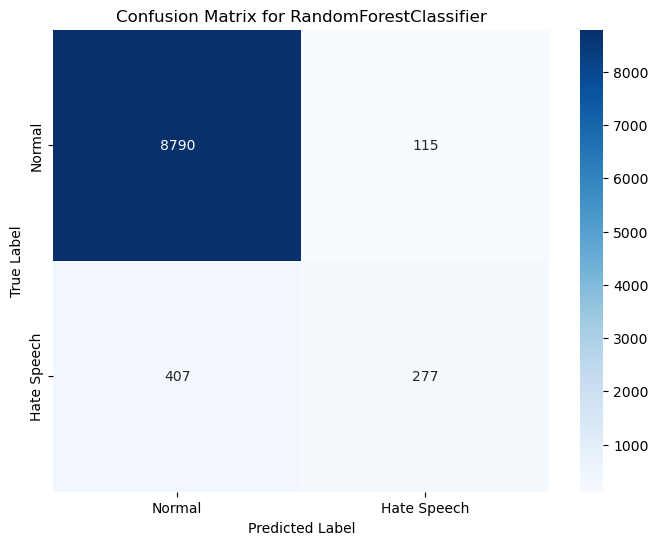

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the validation set
prediction = rf.predict(xvalid_tfidf)

# Calculate the confusion matrix
cm = confusion_matrix(yvalid, prediction)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Hate Speech'], yticklabels=['Normal', 'Hate Speech'])
plt.title('Confusion Matrix for RandomForestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [148]:
# ROC curve plot for RandomForest model

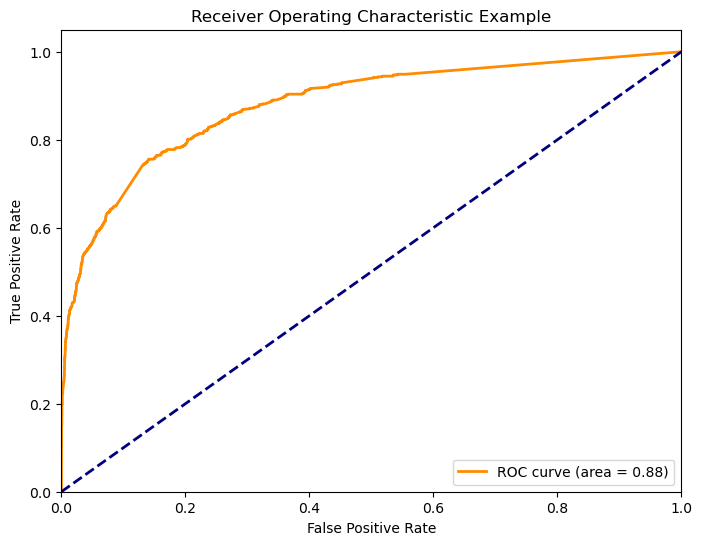

In [149]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# RandomForestClassifier can give probability estimates on prediction using predict_proba
y_scores = rf.predict_proba(xvalid_tfidf)[:, 1]  # score = proba of positive class

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(yvalid, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()


# Confusion matrix plot for SVM

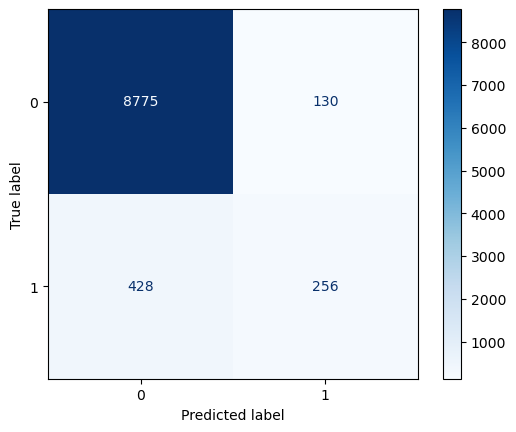

In [150]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming prediction_int are the predicted classes from the thresholded probabilities
cm = confusion_matrix(yvalid, prediction_int)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()



# ROC curve plot for SVM

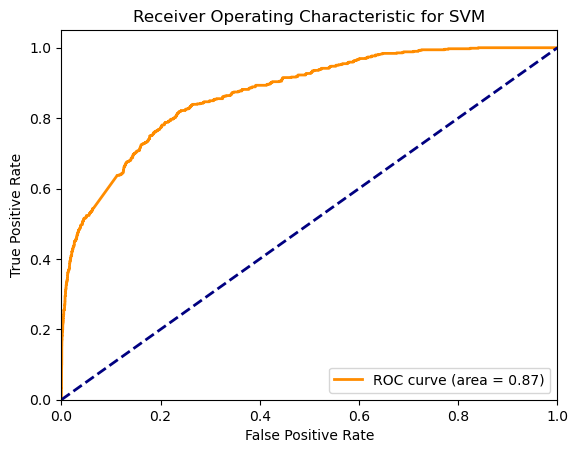

In [151]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure you're using predict_proba to get the predicted probabilities
y_scores = svc.predict_proba(xvalid_bow)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(yvalid, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()


# Confusion Matrix plot for Logistic Regression 

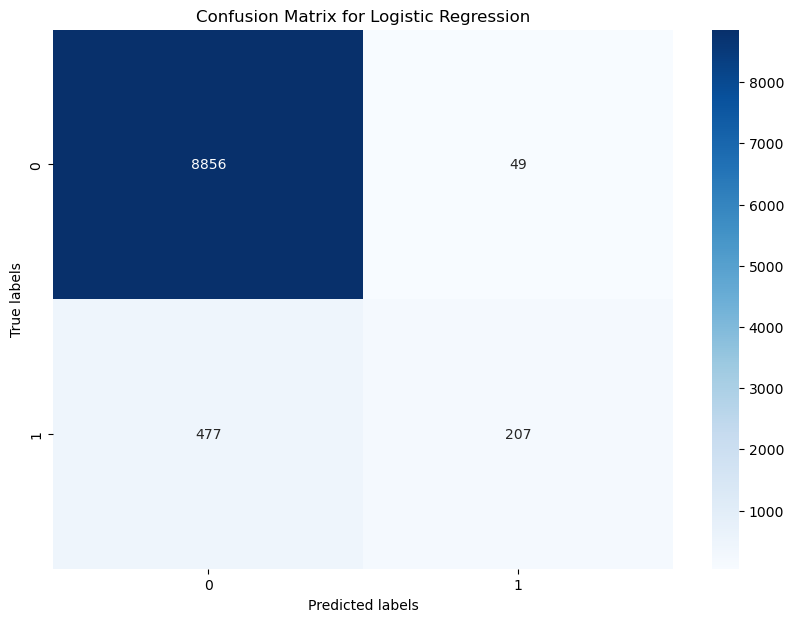

In [152]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class labels on the validation set
prediction = lreg.predict(xvalid_tfidf)

# Compute confusion matrix
cm = confusion_matrix(yvalid, prediction)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


# ROC curve plot for Logistic Regression

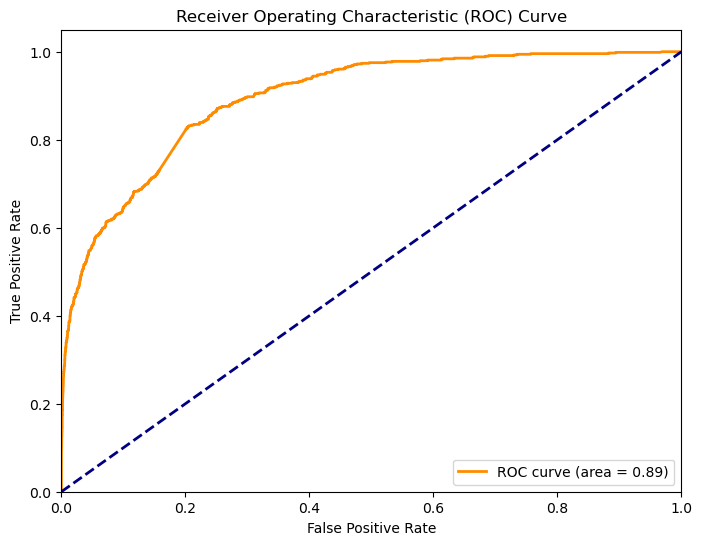

In [153]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities of the positive class
prediction_probs = lreg.predict_proba(xvalid_tfidf)[:, 1]

# Compute ROC curve and ROC area for the model
fpr, tpr, thresholds = roc_curve(yvalid, prediction_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Overall Sentiment score calculation and Conclusion

In [159]:
# Define a function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in stop_words])

# Apply the function to filter out stop words
normal_words_filtered = remove_stopwords(normal_words)
hate_speech_words_filtered = remove_stopwords(hate_speech_words)

# Create sets of unique words from each category
unique_words = set(normal_words_filtered.split()).union(set(hate_speech_words_filtered.split()))

# Function to analyze sentiment of words
def analyze_sentiment(word):
    analysis = TextBlob(word)
    return analysis.sentiment.polarity

# Classifying words by sentiment
positive_words, negative_words, neutral_words = [], [], []

for word in unique_words:
    sentiment = analyze_sentiment(word)
    if sentiment > 0:
        positive_words.append(word)
    elif sentiment < 0:
        negative_words.append(word)
    else:
        neutral_words.append(word)

# Determine the number of words to display for each sentiment category
num_words_to_display = min(len(positive_words), len(negative_words), len(neutral_words))


# Display all words from each sentiment category
print("Positive Words:")
for word in positive_words:
    print(word, end=', ')
print("\n")  # New line after the list of positive words

print("Negative Words:")
for word in negative_words:
    print(word, end=', ')
print("\n")  # New line after the list of negative words

print("Neutral Words:")
for word in neutral_words:
    print(word, end=', ')
print("\n")  # New line after the list of neutral words



Positive Words:
'fun',, ['love',, 'cute',, 'smile',, 

Negative Words:
'hate',, 'black',, 

Neutral Words:
'allahsoil',, 'altwaystoh'], ['trump',, 'liber',, 'fathersday',, 'beauti',, 'healthi',, 'friend',, 'obama',, 'brexit',, 'bigot',, 'hispan',, 'sikh',, 'thank',, 'model',, 'gold',, 'day',, 'templ',, 'libtard',, 'retweet',, 'wso'], 'blm',, 'blog',, 'happi',, 'silver',, 'life',, 'calgary',, 'posit',, 'affirm',, 'polit',, 'summer',, 'tampa',, 'sjw',, 



In [160]:
# Count the number of positive, negative, and neutral words
positive_count = len(positive_words)
negative_count = len(negative_words)
neutral_count = len(neutral_words)

# Calculate the sentiment score
sentiment_score = (positive_count - negative_count) / (positive_count + negative_count)
print("Overall Sentiment Score:", sentiment_score)



Overall Sentiment Score: 0.3333333333333333


# In summary, Our dataset shows a very balanced sentiment profile with a slight tilt towards positivity, indicating a diverse range of expressions or opinions of people. It is basically to recognize the hate speech words. 
